In [1]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation,Dropout
from keras.optimizers import SGD
from keras.utils import np_utils



Using TensorFlow backend.


In [2]:

np.random.seed(1671)  # for reproducibility

# network and training
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10   # number of outputs = number of digits
OPTIMIZER = SGD()
OPTIMIZER = SGD(lr=0.001) # SGD optimizer, explained later in this chapter
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION



# Downloading online data ( images matrix )

In [3]:
# data: shuffled and split between train and test sets
#
(X_train, y_train), (X_test, y_test) = mnist.load_data()



In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
#import matplotlib.pyplot as plt
#image_index = 7777 # You may select anything up to 60,000
#print(y_train[image_index]) # The label is 8
#plt.imshow(X_train[image_index], cmap='Greys')

In [6]:
#X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
RESHAPED = 784
#
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')



In [7]:

# normalize 
#
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')



60000 train samples
10000 test samples


In [8]:
print(y_train)

[5 0 4 ... 5 6 8]


# ONE HOT ENCODING

In [9]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)



In [10]:
print(Y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


# DROPOUT
Dropout, applied to a layer, consists of randomly dropping out
(setting to zero) a number of output features of the layer during training. 

Let’s say a given layer would normally return a vector [0.2, 0.5, 1.3, 0.8, 1.1] for a given input
sample during training. 
After applying dropout, this vector will have a few zero entries
distributed at random: for example, [0, 0.5, 1.3, 0, 1.1]. 

The dropout rate is the fraction of the features that are zeroed out; it’s usually set between 0.2 and 0.5. 

At test time, no units are dropped out; instead, the layer’s output values are scaled down by a factor
equal to the dropout rate, to balance for the fact that more units are active than at
training time

# DEFINING MODEL

In [11]:
# 10 outputs
# final stage is softmax

model = Sequential()

# Add an input layer 
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(BatchNormalizatio())

model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(0.3))


# Output layer
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
__________

In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer=OPTIMIZER,
              metrics=['categorical_accuracy'])



# TRAINING MODEL

In [13]:
history = model.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE, epochs=NB_EPOCH,
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 3s 62us/step - loss: 2.3168 - categorical_accuracy: 0.1263 - val_loss: 2.2085 - val_categorical_accuracy: 0.2549
Epoch 2/20
48000/48000 [==============================] - 2s 41us/step - loss: 2.1883 - categorical_accuracy: 0.2271 - val_loss: 2.0790 - val_categorical_accuracy: 0.4608
Epoch 3/20
48000/48000 [==============================] - 2s 41us/step - loss: 2.0679 - categorical_accuracy: 0.3314 - val_loss: 1.9352 - val_categorical_accuracy: 0.5845
Epoch 4/20
48000/48000 [==============================] - 2s 40us/step - loss: 1.9349 - categorical_accuracy: 0.4185 - val_loss: 1.7724 - val_categorical_accuracy: 0.6571
Epoch 5/20
48000/48000 [==============================] - 2s 41us/step - loss: 1.7936 - categorical_accuracy: 0.4836 - val_loss: 1.5992 - val_categorical_accuracy: 0.7032
Epoch 6/20
48000/48000 [==============================] - 2s 42us/step - loss: 1.6520 - categor

# Model Performance [ Accuracy ]

In [16]:
import matplotlib.pyplot as plt

In [17]:
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
#print("\nTest score:", score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 0s 31us/step
Test accuracy: 0.8662


dict_keys(['val_loss', 'val_categorical_accuracy', 'loss', 'categorical_accuracy'])


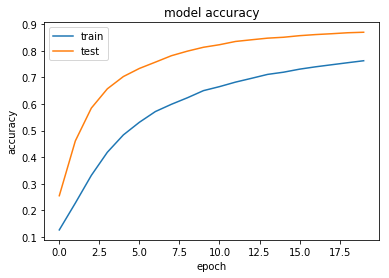

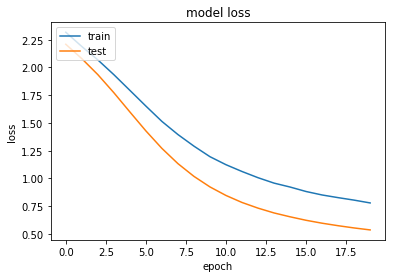

In [19]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()